In [31]:
import LSTM
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 所有数据的第0号作为训练数据，其余作为测试数据

In [32]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
TrainData,TestData={},{}
for k in data.keys():
    if '.csv0' in k:
        TrainData[k]=data[k]
    else:
        TestData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(TrainData[k].shape[0]-step-1):
        xtrain.append(TrainData[k][i:i+step,1:TrainData[k].shape[1]-4].tolist())
        ytrain.append(TrainData[k][i+1+step,[-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))

# LSTM

## 训练

Net(
  (lstm): LSTM(64, 10, batch_first=True, dropout=0.5)
  (fc1): Linear(in_features=200, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=4, bias=True)
)


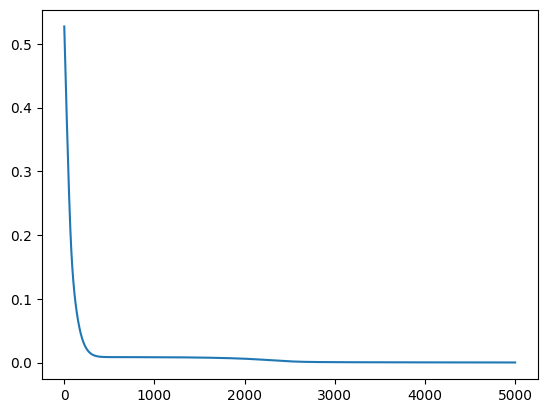

In [33]:
param={
        'inputsize':xtrain.shape[2],
        'outputsize':ytrain.shape[1],
        'windowsize':xtrain.shape[1],
        'LSTM_hidden':10,
        'num_layer':1,
        'learning_rate':0.0001,
        'opt':'Adam',
    }

train=True
initial_train=True
net = LSTM.Net(param)
print(net)
if train:
    if not initial_train:
        net.model = torch.load('./model/LSTM')
    optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
    loss_func = torch.nn.MSELoss()
    mse=[]
    for t in range(5000):
        output = net(xtrain)
        loss = loss_func(output,ytrain)
        mse.append(loss.detach().numpy())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    torch.save(net,'./model/LSTM')        
    plt.plot(mse)

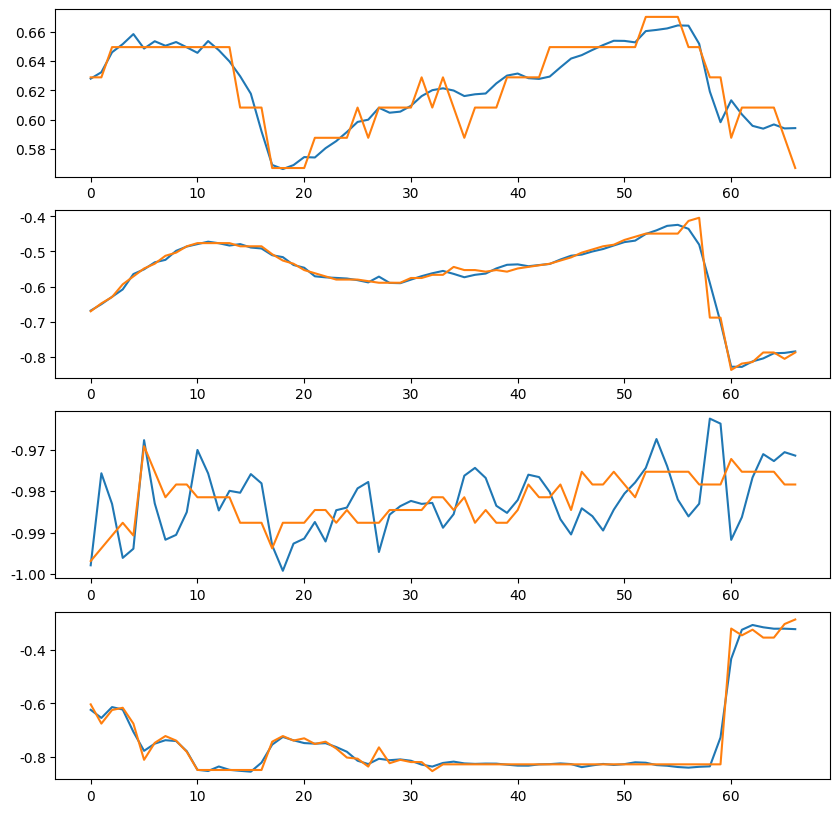

In [34]:
yp = net(xtrain)
fig,ax=plt.subplots(4,1,figsize=(10,10))
for i in range(4):
    ax[i].plot(yp.detach().numpy()[:,i])
    ax[i].plot(ytrain.detach().numpy()[:,i])

## 测试

In [35]:
for f in TestData.keys():
    step=20
    xtest,ytest=[],[]
    for i in range(TestData[f].shape[0]-step-1):
        xtest.append(TestData[f][i:i+step,1:TestData[f].shape[1]-4].tolist())
        ytest.append(TestData[f][i+1+step,[-4,-3,-2,-1]].tolist())
    xtest = Variable(torch.FloatTensor(xtest))
    ytest = Variable(torch.FloatTensor(ytest))
    print(xtest.shape,f)
    yp = net(xtest)
    #mse = np.sqrt(np.mean(np.square(y1.detach().numpy()-yp.detach().numpy())))
    pd.DataFrame(yp.detach().numpy()).to_csv('./results/LSTM/results_'+f)
    
    os.chdir(os.path.pardir)
    print(os.getcwd())
    pd.DataFrame(yp.detach().numpy()).to_csv('./Step4_Compare/results_p/LSTM/results_'+f)
    os.chdir('/Users/tianwenchong/Desktop/Text12-Koopman-WQ/Step3_DNN')

torch.Size([210, 20, 64]) 75.csv1
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([157, 20, 64]) 75.csv2
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([236, 20, 64]) 75.csv3
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([424, 20, 64]) 75.csv4
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([488, 20, 64]) 75.csv5
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([854, 20, 64]) 75.csv6
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([511, 20, 64]) 75.csv7
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([457, 20, 64]) 75.csv8
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([901, 20, 64]) 75.csv9
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([34, 20, 64]) 75.csv10
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([503, 20, 64]) 75.csv11
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([292, 20, 64]) 75.csv12
/Users/tianwenchong/Desktop/Text12-Koopman-WQ
torch.Size([321, 20, 64]) 75.csv13
/Us